# TASK 3:  UNSUPERVISED MACHINE LEARNING DS PROJECT

## Problem Statement:- From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

## Importing all the Required Packages

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Perform Statistical Data analysis:

In [4]:
data = pd.read_csv("iris.csv")
data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Removing id column as it isn't important:

In [5]:
data.drop(labels='Id',axis=1,inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


*Checking for Null Values*

In [7]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## DATA VISUALIZATION OF DATA

#### *Boxplots are best out of all plots to identify outliers*

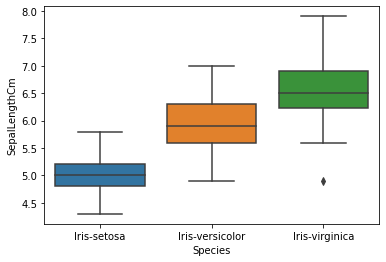

In [9]:
ax=sns.boxplot(x="Species", y="SepalLengthCm", data=data)

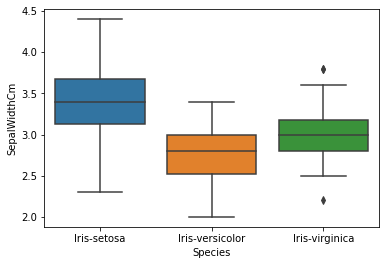

In [10]:
sns.boxplot(x="Species", y="SepalWidthCm", data=data)

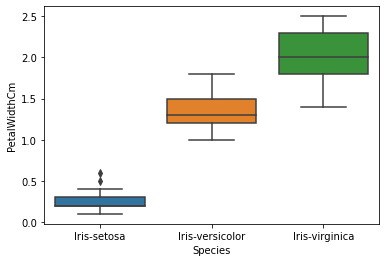

In [11]:
sns.boxplot(x="Species", y="PetalWidthCm", data=data)

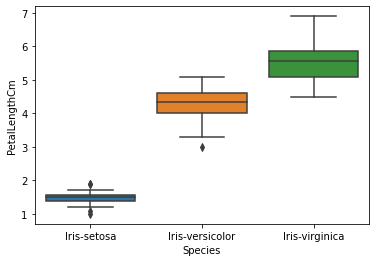

In [12]:
sns.boxplot(x="Species", y="PetalLengthCm", data=data)

## Labelling species:

In [17]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()

data['species']=encoder.fit_transform(data['Species'])
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,species,ScaledSepalLength,Check_Outliers
0,5.1,3.5,1.4,0.2,Iris-setosa,0,0.222222,"(0.2, 0.4]"
1,4.9,3.0,1.4,0.2,Iris-setosa,0,0.166667,"(-0.001, 0.2]"
2,4.7,3.2,1.3,0.2,Iris-setosa,0,0.111111,"(-0.001, 0.2]"
3,4.6,3.1,1.5,0.2,Iris-setosa,0,0.083333,"(-0.001, 0.2]"
4,5.0,3.6,1.4,0.2,Iris-setosa,0,0.194444,"(-0.001, 0.2]"


## Remove Outliers:

In [19]:
data['Check_Outliers']=pd.cut(data['SepalLengthCm'],5)
data[['Check_Outliers','SepalLengthCm']].groupby('Check_Outliers',as_index=False).count()

,Check_Outliers,SepalLengthCm
0,"(4.296, 5.02]",32
1,"(5.02, 5.74]",41
2,"(5.74, 6.46]",42
3,"(6.46, 7.18]",24
4,"(7.18, 7.9]",11


In [20]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
scale = scale.fit(data[['SepalLengthCm']])
scaled_SL = scale.transform(data[['SepalLengthCm']])
data['ScaledSepalLength']=scaled_SL
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,species,ScaledSepalLength,Check_Outliers
0,5.1,3.5,1.4,0.2,Iris-setosa,0,0.222222,"(5.02, 5.74]"
1,4.9,3.0,1.4,0.2,Iris-setosa,0,0.166667,"(4.296, 5.02]"
2,4.7,3.2,1.3,0.2,Iris-setosa,0,0.111111,"(4.296, 5.02]"
3,4.6,3.1,1.5,0.2,Iris-setosa,0,0.083333,"(4.296, 5.02]"
4,5.0,3.6,1.4,0.2,Iris-setosa,0,0.194444,"(4.296, 5.02]"


In [59]:
data.drop(labels='Check_Outliers',axis=1,inplace=True)
data['Check_Outliers']=pd.cut(data['ScaledSepalLength'],5)
data.groupby('Check_Outliers',as_index=False).count()

,Check_Outliers,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,species,ScaledSepalLength
0,"(-0.001, 0.2]",32,32,32,32,32,32,32
1,"(0.2, 0.4]",41,41,41,41,41,41,41
2,"(0.4, 0.6]",42,42,42,42,42,42,42
3,"(0.6, 0.8]",24,24,24,24,24,24,24
4,"(0.8, 1.0]",11,11,11,11,11,11,11


In [60]:
lower_bound=0.1
upper_bound=0.95

limit_to_bounds=data['SepalLengthCm'].quantile([lower_bound,upper_bound])
limit_to_bounds

0.10    4.800
0.95    7.255
Name: SepalLengthCm, dtype: float64

In [61]:
considerable_data=(data['SepalLengthCm']<limit_to_bounds.loc[upper_bound])
considerable_data.value_counts()

True     142
False      8
Name: SepalLengthCm, dtype: int64

## Final Dataset (without outliers):

In [62]:
final_data=data[considerable_data].copy()
final_data.shape

(142, 8)

## Data Visualization (species segregatted):

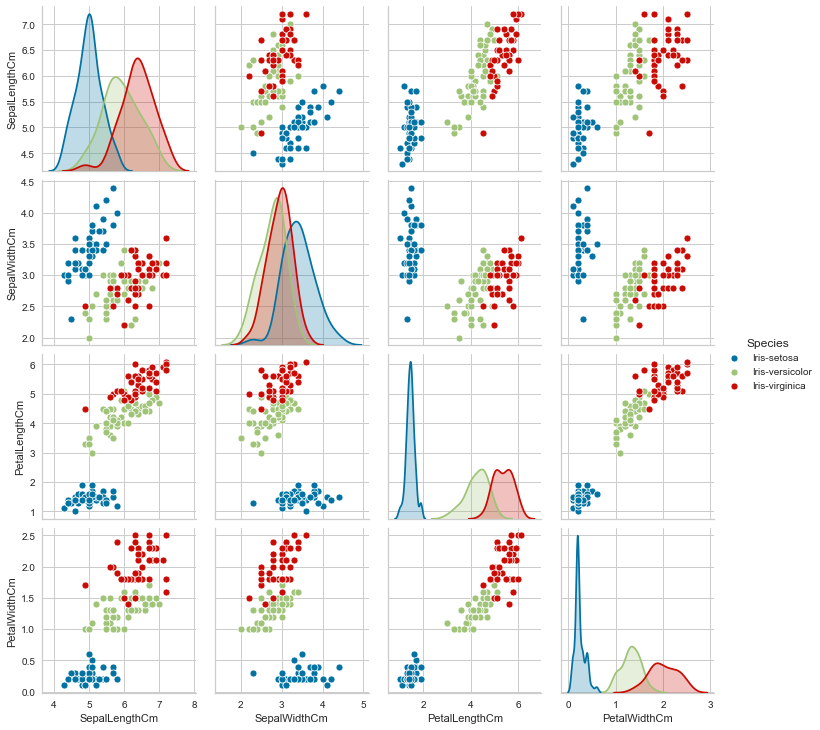

In [63]:
sns.pairplot(final_data.iloc[:,[0,1,2,3,4]],hue='Species')

## TO FIND THE VALUE OF OPTIMAL 'K' USING THE KELBOW VISUALIZER 

C:\Anaconda\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000002001245C700>,
                 k=None, model=None)

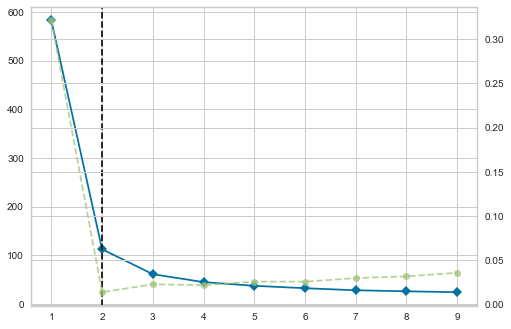

In [64]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
model1 = KMeans() 
visualizer = KElbowVisualizer(model1, k=(1,10)) 
visualizer.fit(final_data.iloc[:,[0,1,2,3]])

## Fitting the data into kmeans model

In [65]:
x=final_data.iloc[:,[0,1,2,3]]
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
iris_kmeans= kmeans.fit(x)

## Visualizing the centroid:

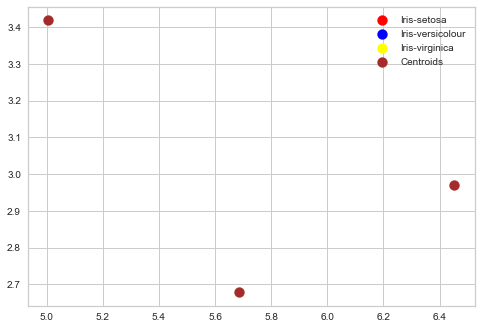

In [66]:
x = np.array(x)
plt.scatter(x[kmeans == 0, 0], x[kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[kmeans == 1, 0], x[kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[kmeans == 2, 0], x[kmeans == 2, 1],
            s = 100, c = 'yellow', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'brown', label = 'Centroids')

plt.legend()

## Visualizing clusters and the 3 centroids:

Clusters: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 2 0 2 0 2 0 0 0 0 0 0 2 0 0 0 0 2 0 2 0
 0 2 2 2 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 0 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]

Cluster-centers: [[5.68378378 2.67837838 4.09189189 1.26756757]
 [5.006      3.418      1.464      0.244     ]
 [6.45272727 2.97090909 5.22545455 1.89272727]]


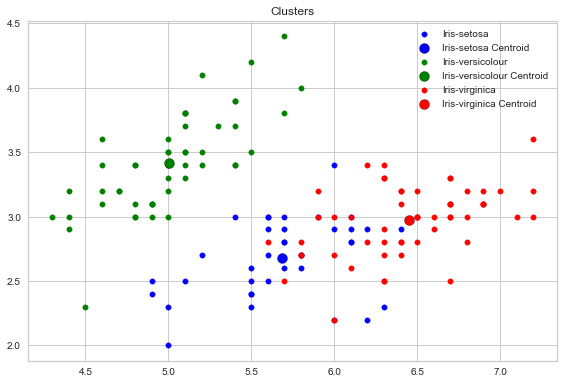

In [71]:
def find_clusters(k):
    kmeans=KMeans(n_clusters=k)
    clusters=kmeans.fit_predict(x)
    print(f"Clusters: {clusters}")
    print()
    print(f"Cluster-centers: {kmeans.cluster_centers_}")
    colors = ['blue','green', 'red']
    labels=['Iris-setosa','Iris-versicolour','Iris-virginica']
    # Visualising the clusters - On the first two columns
    for index in range(k):
        plt.scatter(x[clusters==index,0],x[clusters==index,1],color=colors[index],label=labels[index],s=30)
        # Plotting the centroids of the clusters
        plt.scatter(kmeans.cluster_centers_[index, 0], kmeans.cluster_centers_[index, 1], color=colors[index],label=f'{labels[index]} Centroid',edgecolor="k",s=100)
        
    plt.title("Clusters")
    plt.tight_layout() 
    plt.legend()
    
find_clusters(3)